<a href="https://colab.research.google.com/github/Divyanshu-ISM/Machine-Learning-Deep-Learning/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicing Regression and Hands on Feature Engineering. 

> Divyanshu Vyas | Oil and Gas Data Science

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
len(df)

50

In [8]:
x1 = df['R&D Spend']
x2 = df['Administration']
x3 = df['Marketing Spend']
x_4 = df['State']
y = df['Profit']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


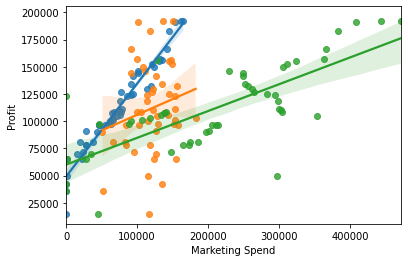

In [11]:
sns.regplot(x1,y)
sns.regplot(x2,y)
sns.regplot(x3,y)

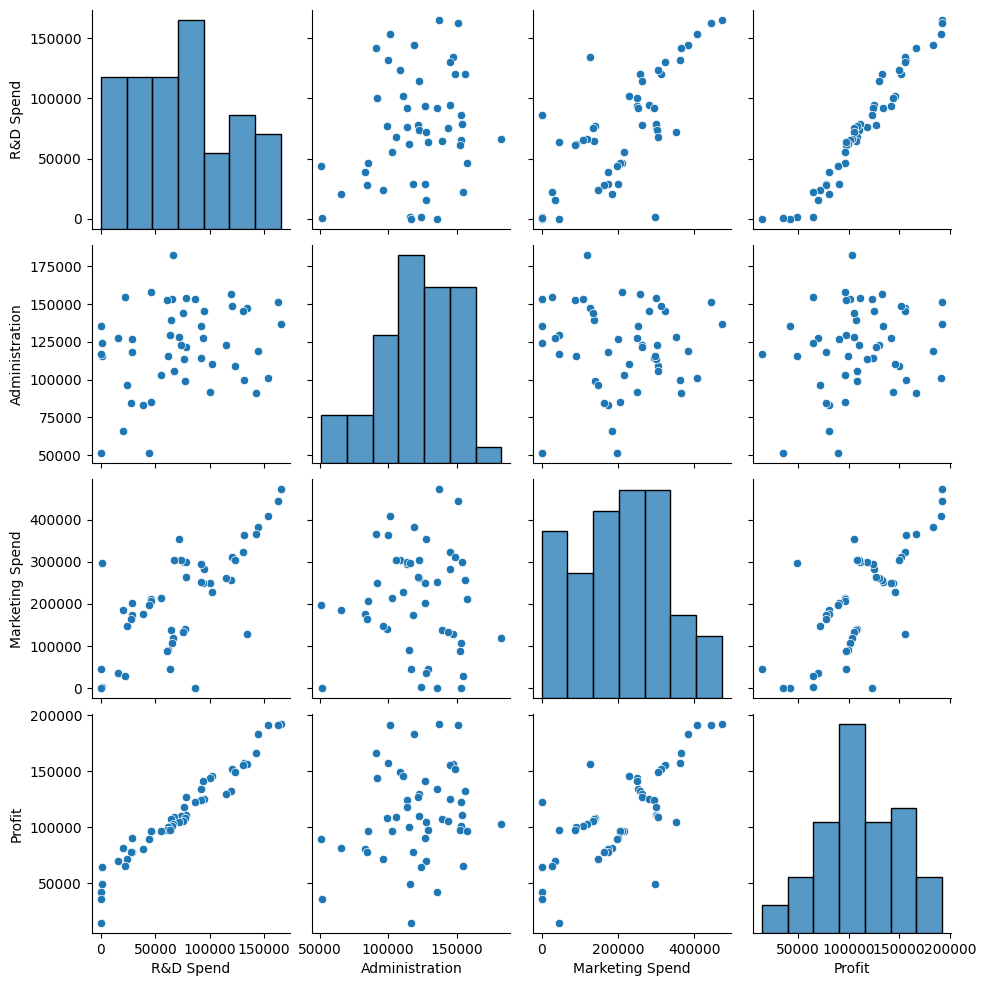

In [13]:
plt.style.use('default')
sns.pairplot(df)

In [14]:
set(df['State'])

{'California', 'Florida', 'New York'}

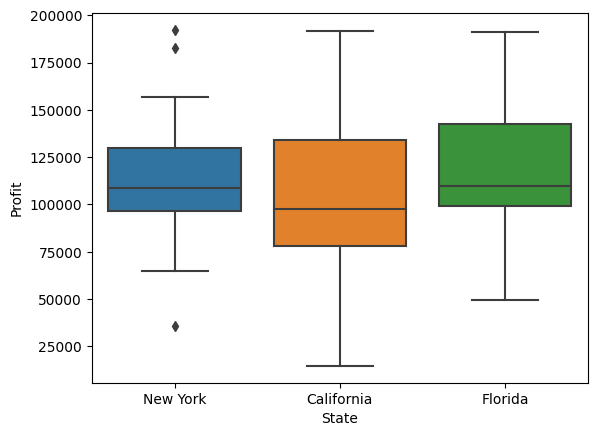

In [15]:
sns.boxplot(x='State',y='Profit',data=df)

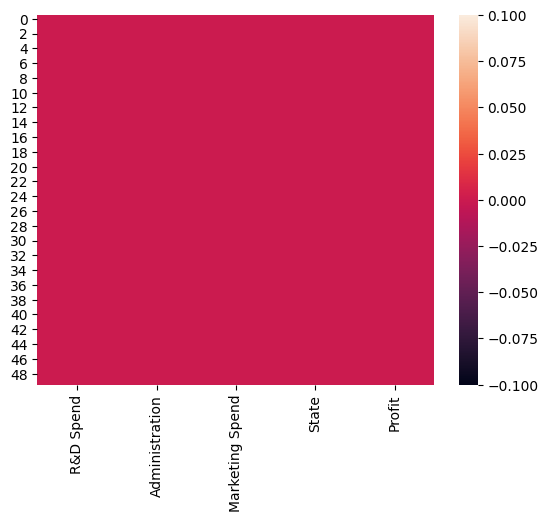

In [16]:
sns.heatmap(df.isnull())

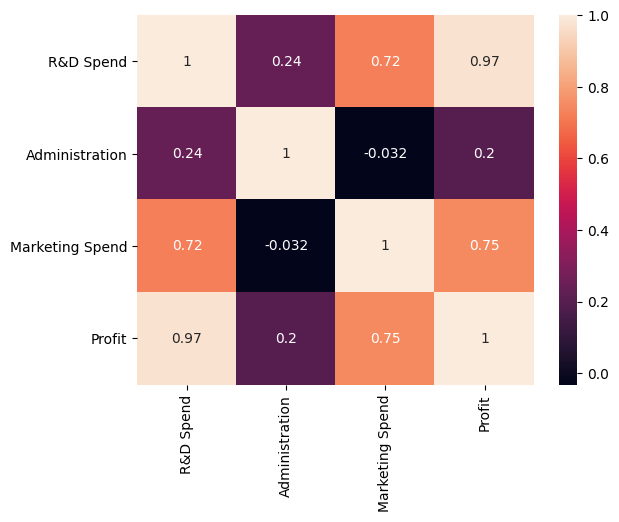

In [18]:
sns.heatmap(df.corr(),annot=True)

# 1. Regression with SK-Learn

### First Up, Encode the Categorical Variable.

In [22]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [24]:
state = pd.get_dummies(df['State'],drop_first=True)

In [26]:
df = df.drop('State',axis=1)

df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [27]:
df = pd.concat([df,state],axis=1)

df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [28]:
X = df.drop('Profit',axis=1)

y = df['Profit']

In [29]:
#Now do the Train Test Split. 
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [31]:
#Creating and Fitting a linear Regression model. 

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#Now Let's PRedict

In [34]:
yp = model.predict(X_test)

In [39]:
print(f'yp:{yp},\n\ny:{list(y_test)}')

yp:[126180.71023786  84282.04182273 100725.40834863  47648.04135995
 129168.62389027  52171.29866289 110656.92317467 100967.73992208],

y:[134307.35, 81005.76, 99937.59, 64926.08, 125370.37, 35673.41, 105733.54, 107404.34]


In [40]:
#Now Let's See Model Metrics

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
r2_score(yp,y_test)

0.8902685933171746

In [43]:
np.sqrt(mean_squared_error(yp,y_test))

9540.72952398428

In [45]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### 2. Importance of Feature Engineering on Model Performance.

A. Dropping one of the highly correlated Features. 

In [51]:
# sns.heatmap(df.corr(),annot=True)
# This shows that Marketing Spend and R&D spend is 0.72 correlated.
# Also, R&D spend is 0.97 correlated to the Output. So let's pick only that.

In [52]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [53]:
X = df.drop(['Profit','Marketing Spend'],axis=1)

In [54]:
y = df['Profit']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
yp1 = lm.predict(X_test)

In [59]:
r2_score(yp1,y_test)

0.8634632607122159

In [60]:
mean_squared_error(yp1,y_test)**0.5

10272.391075995296

B. Dropping the categorical feature. 

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv')

In [63]:
# df.head()
df = df.drop('State',axis=1)

In [64]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [65]:
X = df.drop('Profit',axis=1)
y = df['Profit']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [67]:
lm2 = LinearRegression()

In [68]:
lm2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
yp2 = lm2.predict(X_test)

In [70]:
r2_score(yp2,y_test)

0.8954281371406251

In [71]:
mean_squared_error(yp2,y_test)**0.5

9375.740208690147

In [72]:
#Compared to a previous error of 9500 somethin
#hence this categorical feature is not important it seems.